In [3]:
from pyspark.sql.types import ArrayType, StringType

from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

import pandas as pd
# needed to show matplot plots?
%matplotlib inline
import matplotlib.pyplot as plt

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)



In [30]:
'''
Given a url it plots a detail analysis per country per UA, 
the page in question does need to have loads of traffic as
it only requests an hour

'''


def get_data(page_title):
    
    query = "select access_method, count(*) as c \
        from wmf.webrequest where is_pageview=true and agent_type='user'and year=2019 and month=9 and day=1 and hour in (1,2,3)\
        and  pageview_info['page_title']='%s' group by access_method \
        order by c desc  limit 4 "%(page_title)
    
    query1 = "select  user_agent_map['os_family'] as ua, count(*) as c \
        from wmf.webrequest where is_pageview=true and agent_type='user'and year=2019 and month=9 and day=1 and hour in (1,2,3)\
        and  pageview_info['page_title']='%s' group by user_agent_map['os_family'] \
        order by c desc  limit 10 "%(page_title)
    
    
    query2 = "select geocoded_data['country'] as country, count(*) as c \
        from wmf.webrequest where is_pageview=true and year=2019 and month=9 and day=1 and hour in (1,2,3)\
        and  pageview_info['page_title']='%s' and agent_type='user' group by geocoded_data['country']  \
        order by c desc limit 15"%(page_title)
    
    df = spark.sql(query)
    df_ua = spark.sql(query1)
    df_city = spark.sql(query2)
    df.show(3,False)
    df_ua.show(15, False)
    df_city.show(10, False)

    return (df, df_ua, df_city)


(df, df_ua, df_city) = get_data('Saaho')

    


+-------------+-----+
|access_method|c    |
+-------------+-----+
|mobile web   |33061|
|desktop      |2079 |
|mobile app   |666  |
+-------------+-----+

+-------------+-----+
|ua           |c    |
+-------------+-----+
|Android      |29173|
|iOS          |3950 |
|Windows      |1658 |
|Mac OS X     |322  |
|Firefox OS   |190  |
|Other        |188  |
|Windows CE   |134  |
|Linux        |75   |
|Windows Phone|39   |
|Tizen        |31   |
+-------------+-----+

+--------------------+-----+
|country             |c    |
+--------------------+-----+
|India               |26503|
|United States       |3401 |
|Bangladesh          |955  |
|Nepal               |937  |
|Canada              |689  |
|Pakistan            |523  |
|Australia           |448  |
|Malaysia            |383  |
|United Arab Emirates|313  |
|United Kingdom      |231  |
+--------------------+-----+
only showing top 10 rows



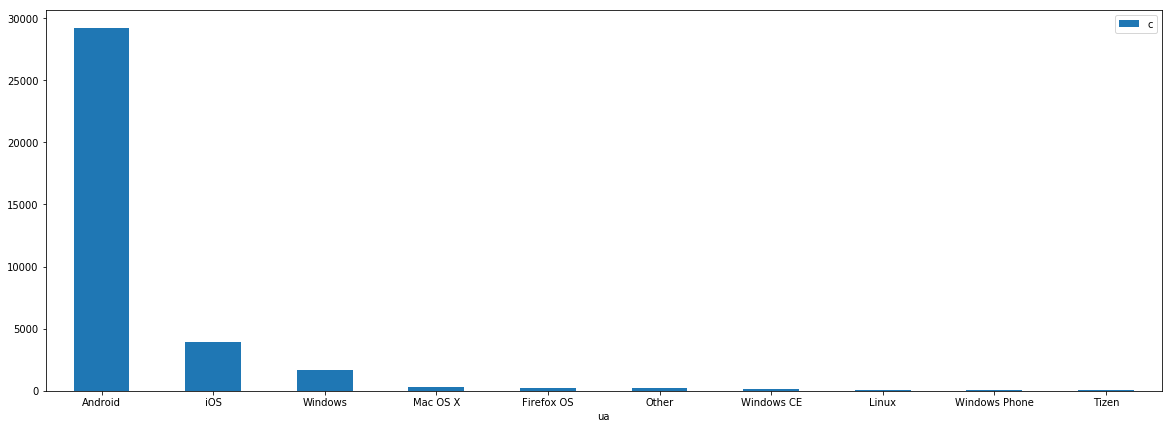

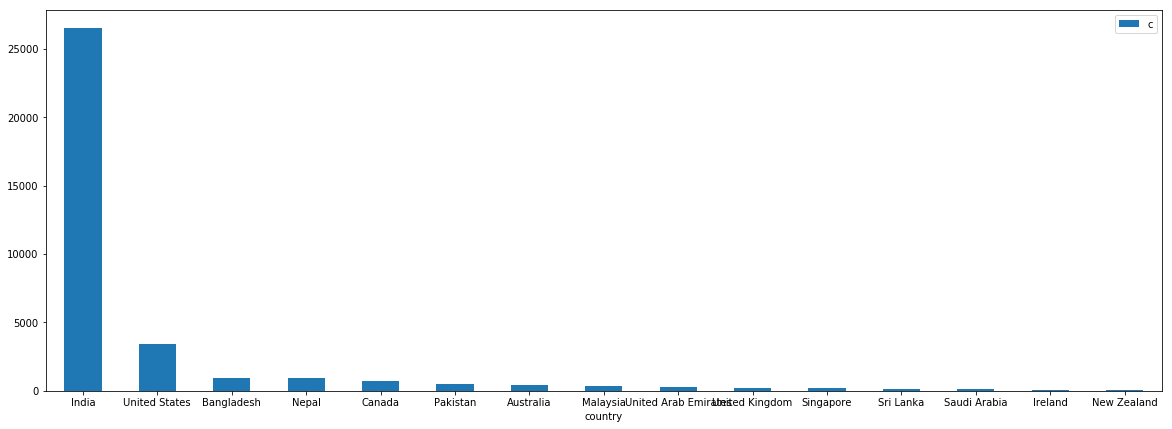

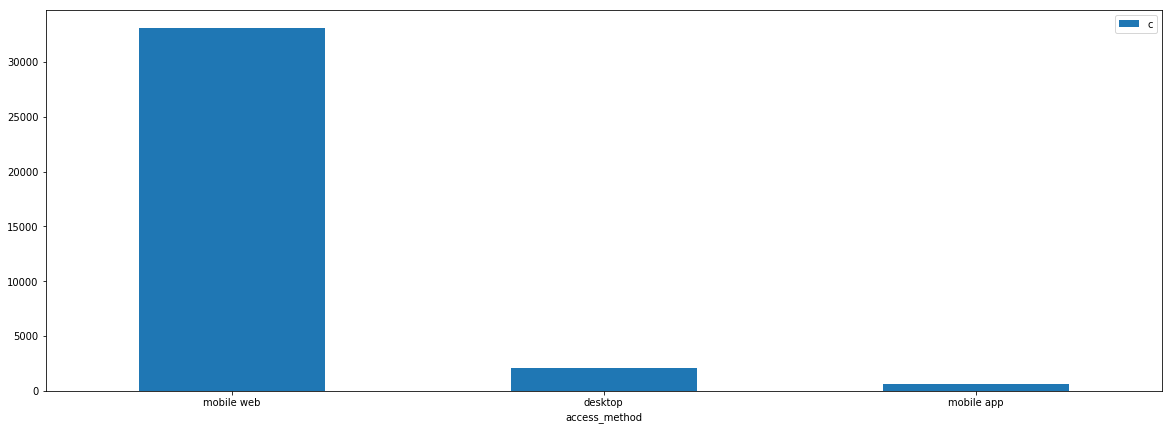

In [33]:
#def plot_detailed_analysis(df, page_title):

#matplotlib.rcParams['figure.figsize'] = [width, height]
plt.rcParams['figure.figsize'] = [20, 7]
    
pandas_df_ua = df_ua.toPandas()
pandas_df_ua.plot.bar(x='ua', y='c', rot=0)
    
plt.show()


pandas_df_city = df_city.toPandas()

pandas_df_city.plot.bar(x='country', y='c', rot=0)

plt.show()

pandas_df = df.toPandas()

pandas_df.plot.bar(x='access_method', y='c', rot=0)

plt.show()


